# Hack Session: Fitting a line to data
### with [Hogg, Bovy, & Lang 2010](https://arxiv.org/pdf/1008.4686.pdf) as our guide

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

### Optimizing the objective function with matrix calculus

Our goal is to study the problem of fitting a line to data using Hogg, Bovy, & Lang (2010; HBL) as our guide. We will assume we have a set of $N > 2$ points ($x_i$, $y_i$) with known, *uncorrelated* Gaussian uncertainties $\sigma_{y_i}$ in the $y$ direction, and zero uncertainty in the $x$ direction (or at least negligible uncertainty compared to the $y$ direction). We are in search of a function $f(x)$ of the form

$$
f(x) = m x + b,
$$

where $m$ is the slope and $b$ is the intercept, that best fits the points. We will accomplish this by minimizing the objective function 

$$
\chi^2 = 
\sum_{i=1}^N \frac{\left[y_i - f(x_i)\right]^2}{\sigma_{y_i}^2}.
$$

As HBL point out, this choice of objective function is not arbitrary. We showed at our last meeting that minimizing $\chi^2$ is equivalent (given our assumptions above) to maximizing the likelihood $\mathcal{L}$, since $\chi^2 = -2 \ln \mathcal{L}$ 

Following HBL, we will use the power of linear algebra to simplify and generalize our calculations. First, we let's write our model as a matrix equation:

$$
\boldsymbol{Y} = \boldsymbol{X}\,\boldsymbol{\theta},  
$$

where

$$
\boldsymbol{Y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}  \quad 
\boldsymbol{X} = 
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\ 
1 & x_N
\end{bmatrix} \quad
\boldsymbol{\theta} = 
\begin{bmatrix}
b \\
m 
\end{bmatrix} 
$$

**Note:** This is different from HBL's notation, who have $\boldsymbol{X}\rightarrow\boldsymbol{A}$ and $\boldsymbol{\theta}\rightarrow\boldsymbol{X}$, which seems like a strange choice to me. 

$\boldsymbol{\theta}$ is our parameter vector, and $\boldsymbol{X}$ is often called the *design matrix*. To express our uncertainties, we use the $N\times N$ *covariance matrix*

$$
\boldsymbol{C} = 
\begin{bmatrix}
\sigma_{y_1}^{2} & 0 & \dots & 0 \\
0 & \sigma_{y_2}^{2} & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma_{y_N}^{2}
\end{bmatrix},
$$

where the diagonal terms are the *variances* of our measurements. Since we have assumed our uncertainties are uncorrelated, all the off-diagonal terms are zero. With this notation, we can express our objective function as

$$
\chi^2 = \left(\boldsymbol{Y}-\boldsymbol{X}\,\boldsymbol{\theta}\right)^\mathsf{\,T}
 \,\boldsymbol{C}^{\,-1}\,\left(\boldsymbol{Y}-\boldsymbol{X}\,\boldsymbol{\theta}\right).
$$


By taking the derivative with respect to $\boldsymbol{\theta}$ and setting the result to zero, one can show that the best-fit solution is given by

$$
\boldsymbol{\theta}_\mathrm{best} = \left[\boldsymbol{X}^\mathsf{\,T} \, \boldsymbol{C}^{\,-1} \, \boldsymbol{X}\right]^{\,-1} \, 
    \boldsymbol{X}^\mathsf{\,T} \, \boldsymbol{C}^{\,-1} \, \boldsymbol{Y}.
$$

When the uncertainties are Gaussian and their variances $\sigma_{y_i}^2$ are correctly estimated, the $2\times 2$ covariance matrix on our best-fit parameters is given by the first term on the right side of the above expression:

$$
\Sigma = \left[\boldsymbol{X}^\mathsf{\,T} \, \boldsymbol{C}^{\,-1}\boldsymbol{X}\right]^{\,-1}.
$$

Alright, we have everything we need to do the first three exercises of HBL, so let's go! 

To help you out, here's the data from Table 1 of HBL stored as a [structured array](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.rec.html)

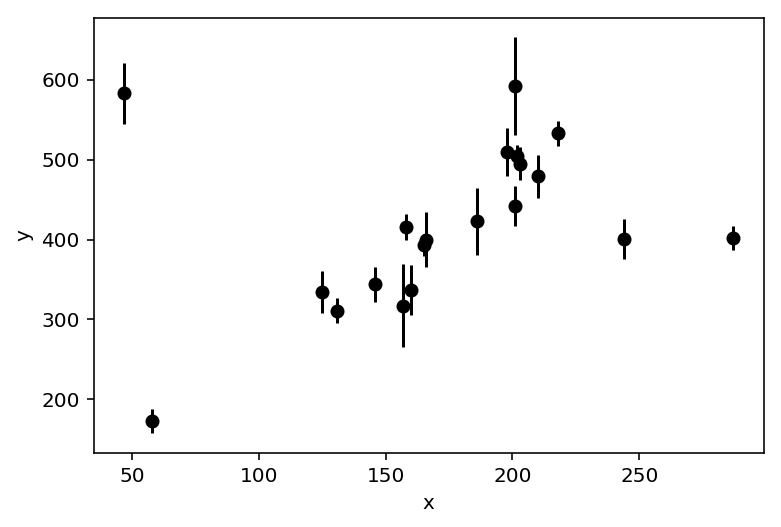

In [2]:
columns = [('id', int), ('x', float), ('y', float), 
           ('sig_y', float), ('sig_x', float), ('rho_xy', float)]

table = np.array(
    [(1, 201, 592, 61, 9, -0.84),
    (2, 244, 401, 25, 4, 0.31),
    (3, 47, 583, 38, 11, 0.64),
    (4, 287, 402, 15, 7, -0.27),
    (5, 203, 495, 21, 5, -0.33),
    (6, 58, 173, 15, 9, 0.67),
    (7, 210, 479, 27, 4, -0.02),
    (8, 202, 504, 14, 4, -0.05),
    (9, 198, 510, 30, 11, -0.84),
    (10, 158, 416, 16, 7, -0.69),
    (11, 165, 393, 14, 5, 0.30),
    (12, 201, 442, 25, 5, -0.46),
    (13, 157, 317, 52, 5, -0.03),
    (14, 131, 311, 16, 6, 0.50),
    (15, 166, 400, 34, 6, 0.73),
    (16, 160, 337, 31, 5, -0.52),
    (17, 186, 423, 42, 9, 0.90),
    (18, 125, 334, 26, 8, 0.40),
    (19, 218, 533, 16, 6, -0.78),
    (20, 146, 344, 22, 5, -0.56)],
    dtype=columns)

plt.errorbar(table['x'], table['y'], yerr=table['sig_y'], fmt='ko')
plt.xlabel('x')
plt.ylabel('y');

## Some helpful functions to know about

In [3]:
print(np.vander(table['x'], N=2, increasing=True))

[[  1. 201.]
 [  1. 244.]
 [  1.  47.]
 [  1. 287.]
 [  1. 203.]
 [  1.  58.]
 [  1. 210.]
 [  1. 202.]
 [  1. 198.]
 [  1. 158.]
 [  1. 165.]
 [  1. 201.]
 [  1. 157.]
 [  1. 131.]
 [  1. 166.]
 [  1. 160.]
 [  1. 186.]
 [  1. 125.]
 [  1. 218.]
 [  1. 146.]]


Look, that's the design matrix!!!

In [4]:
C = np.diag(table['sig_y']**2) # here's the covariance matrix!!!
Cinv = np.linalg.inv(C)        # and its inverse!!!

## Exercise 1

Using the standard linear algebra method, fit the straight line $y = mx + b$ to the $x$, $y$, and $\sigma_y$ values for data points 5 through 20 in Table 1 on page 6. That is, ignore the first four data points, and also ignore the columns for $\sigma_x$ and $\rho_{xy}$. Make a plot showing the points, their uncertainties, and the best-fit line. Your plot should end up looking like Figure 1 of HBL. What is the standard uncertainty variance $\sigma_m^2$ on the slope of the line?

## Exercise 2

Repeat Exercise 1 but for all the data points in Table 1 on page 6. Your plot should end up looking like Figure 2 of HBL. What is the standard uncertainty variance $\sigma_m^2$ on the slope of the line? Is there anything you don’t like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?

## Exercise 3

Generalize the method to fit a general quadratic (second order) relationship. Add another column to matrix $\boldsymbol{X}$ containing the values $x^2_i$, and another element to vector $\boldsymbol{\theta}$ (call it $q$). Then, re-do Exercise 1 but fitting for and plotting the best quadratic relationship

$$
g(x) = q x^2 + m x + b.
$$

Your plot should end up looking like Figure 3 of HBL.